In [2]:
# impoutation in base alla media settoriale 
# bond basati su spread curve

# import libraries

In [3]:
import pandas as pd
from utils import EDA
pd.set_option('display.max_columns', None)

# Load Data

In [4]:
df = pd.read_csv('data/processed_data/prepared_data.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6401 entries, 0 to 6400
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TICKER                     6401 non-null   object 
 1   Year                       6401 non-null   int64  
 2   Current_Ratio              4944 non-null   float64
 3   Debt_to_Equity             6375 non-null   float64
 4   Net_Income_to_Assets       6176 non-null   float64
 5   Operating_Margin           5472 non-null   float64
 6   Cash_Ratio                 5610 non-null   float64
 7   Operating_Cash_Flow_Ratio  6368 non-null   float64
 8   Settore                    4954 non-null   object 
 9   esg overall                4646 non-null   float64
 10  esg environmental          4409 non-null   float64
 11  esg social                 4409 non-null   float64
 12  esg governance             4546 non-null   float64
 13  downside risk              3922 non-null   float

In [6]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.columns

Index(['TICKER', 'Year', 'Current_Ratio', 'Debt_to_Equity',
       'Net_Income_to_Assets', 'Operating_Margin', 'Cash_Ratio',
       'Operating_Cash_Flow_Ratio', 'Settore', 'esg overall',
       'esg environmental', 'esg social', 'esg governance', 'downside risk'],
      dtype='object')

In [7]:
# DATA DESCRIPTION
pd.merge(df.describe().T, pd.DataFrame(df.isnull().sum(),columns=['null values']), left_index=True, right_index=True)

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,min,25%,50%,75%,max,std,null values
Year,6401,2017-09-23 20:56:25.720980992,2011-01-01 00:00:00,2015-01-01 00:00:00,2018-01-01 00:00:00,2021-01-01 00:00:00,2024-01-01 00:00:00,NaN,0
Current_Ratio,4944.0,1.811287,0.13598,1.020351,1.423998,2.120786,19.252267,1.420789,1457
Debt_to_Equity,6375.0,2.635221,-2661.586699,0.922088,1.593803,4.032865,990.204154,57.760295,26
Net_Income_to_Assets,6176.0,inf,-1.201942,0.021339,0.055654,0.095759,inf,NaN,225
Operating_Margin,5472.0,-inf,-inf,0.093426,0.161339,0.255144,1.253722,NaN,929
Cash_Ratio,5610.0,0.280474,-0.967817,0.030793,0.10159,0.290732,8.209113,0.542703,791
Operating_Cash_Flow_Ratio,6368.0,0.204391,-1.141379,0.082171,0.138767,0.232642,5.735814,0.287236,33
esg overall,4646.0,3.859453,0.04,2.78,3.89,4.81,8.37,1.337453,1755
esg environmental,4409.0,2.666609,0.0,0.51,2.62,4.32,10.0,2.144857,1992
esg social,4409.0,3.083198,0.0,1.61,2.65,4.37,10.0,1.935224,1992


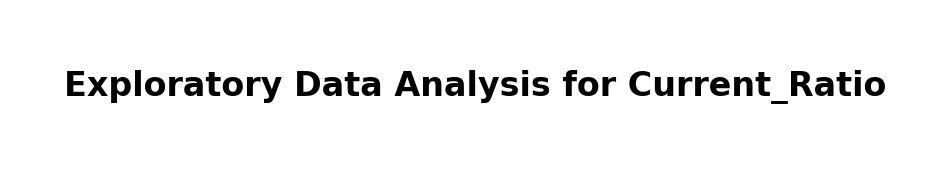

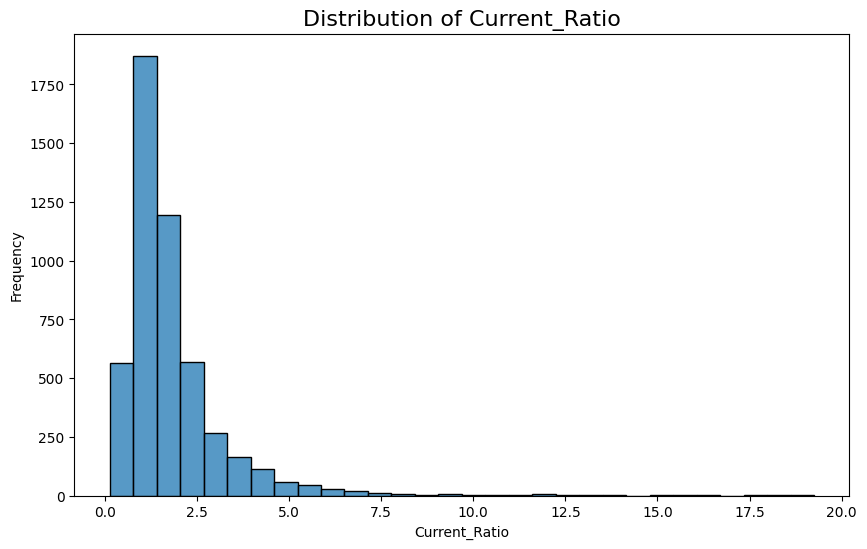

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


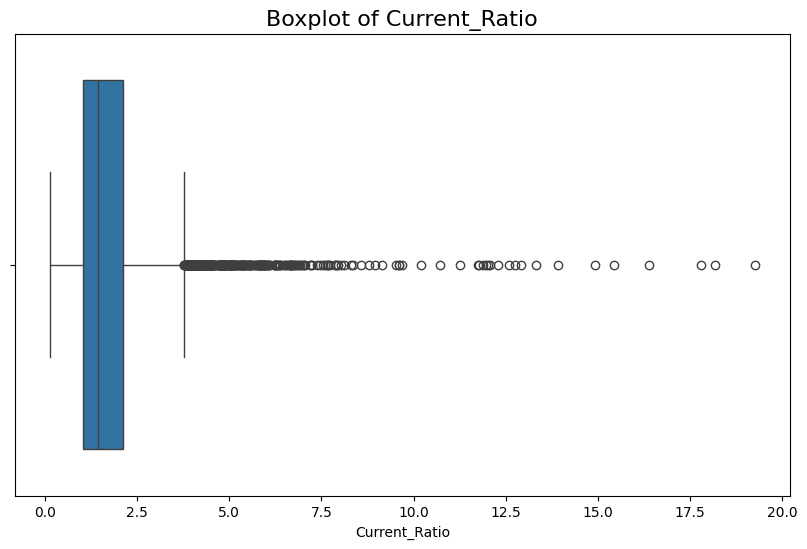

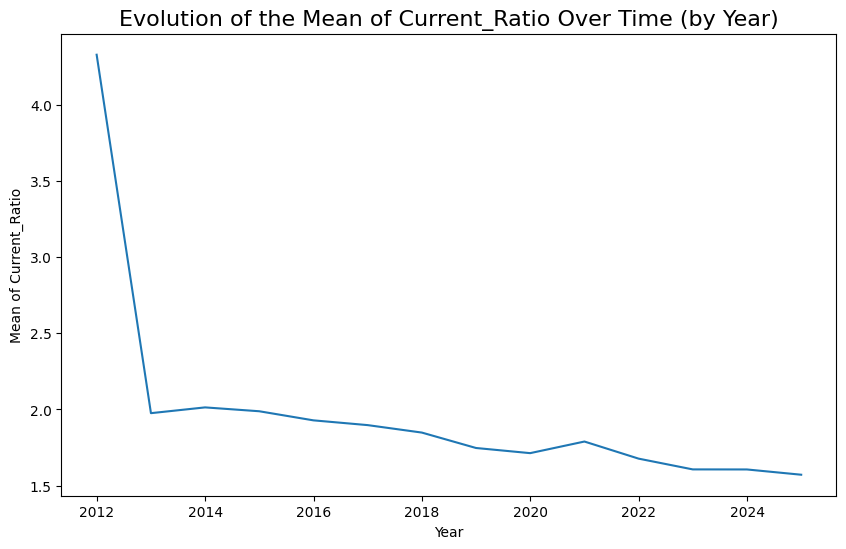

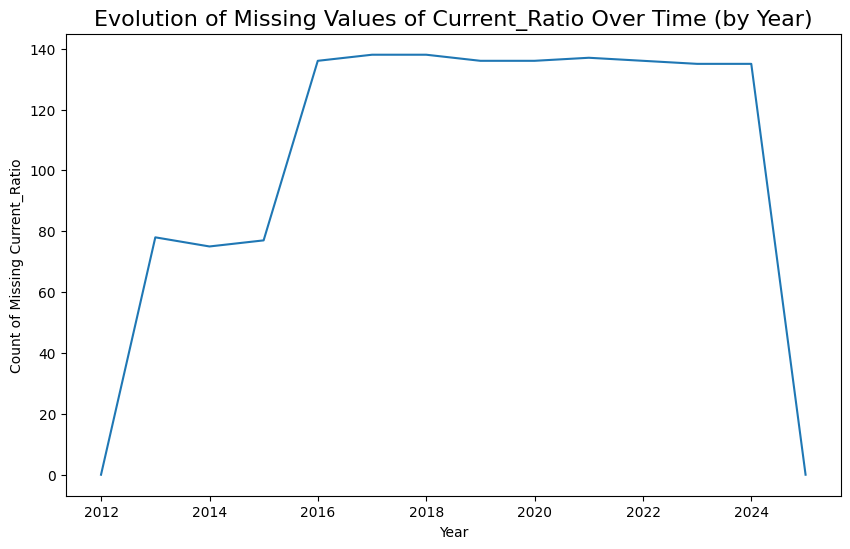

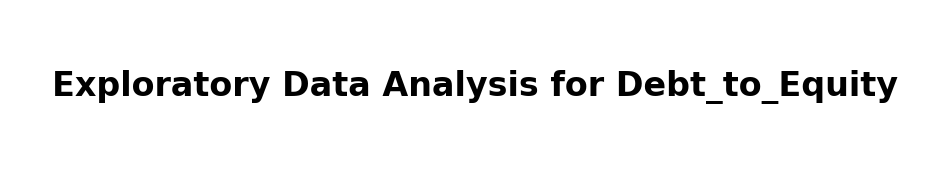

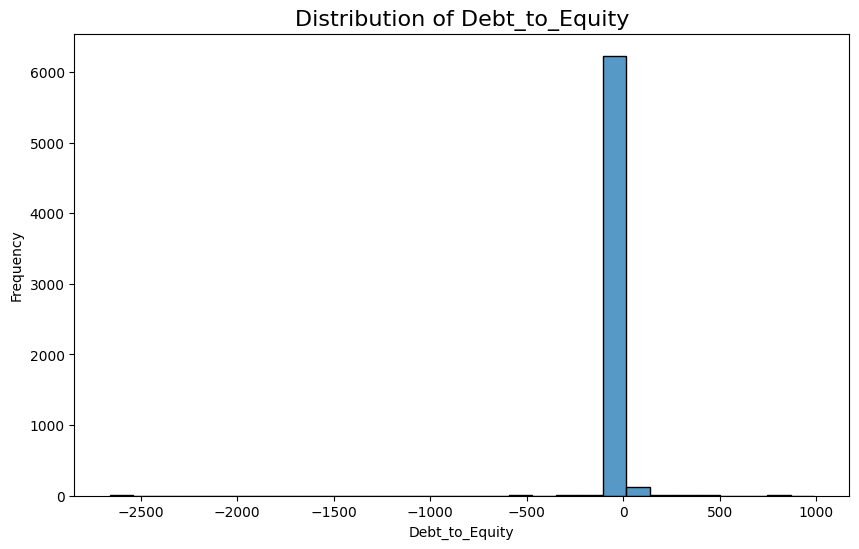

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


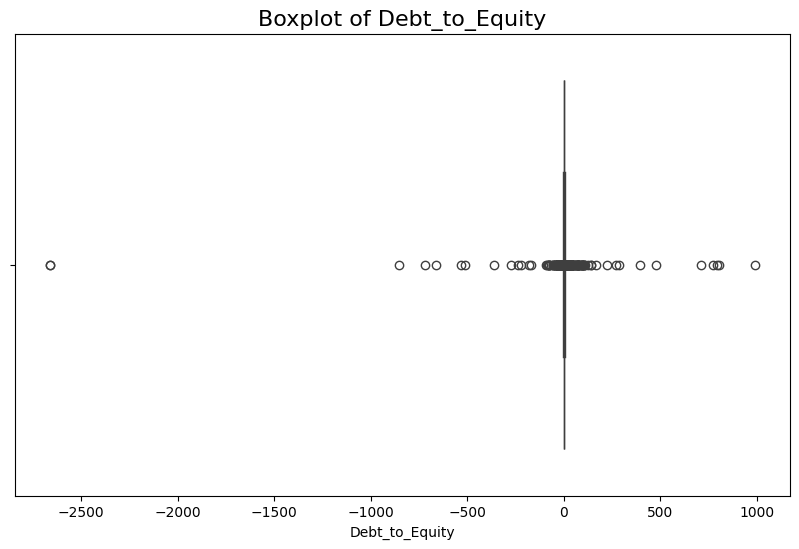

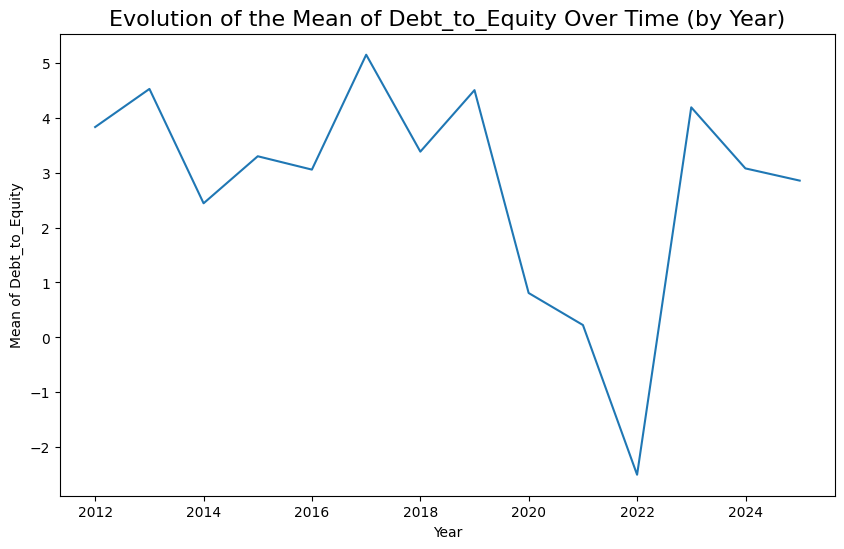

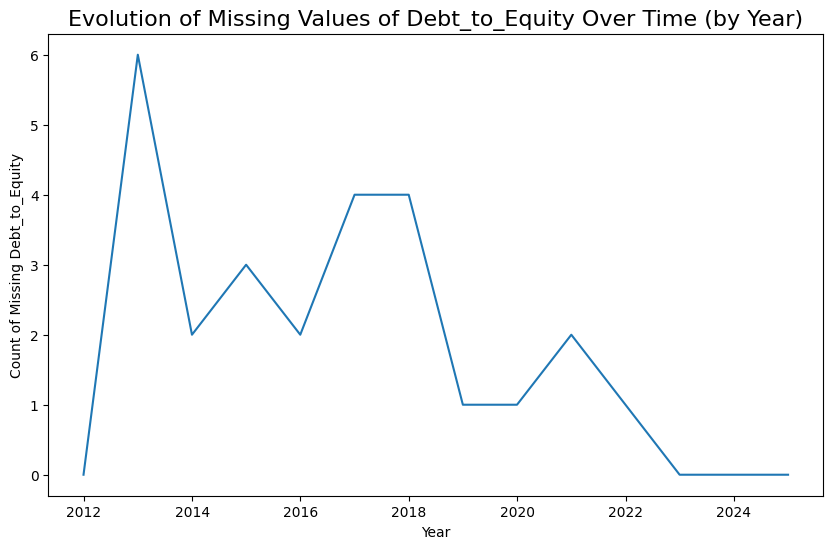

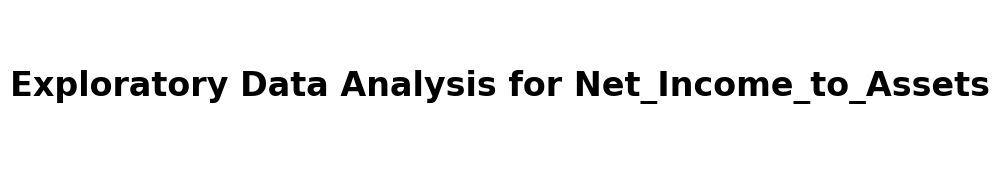

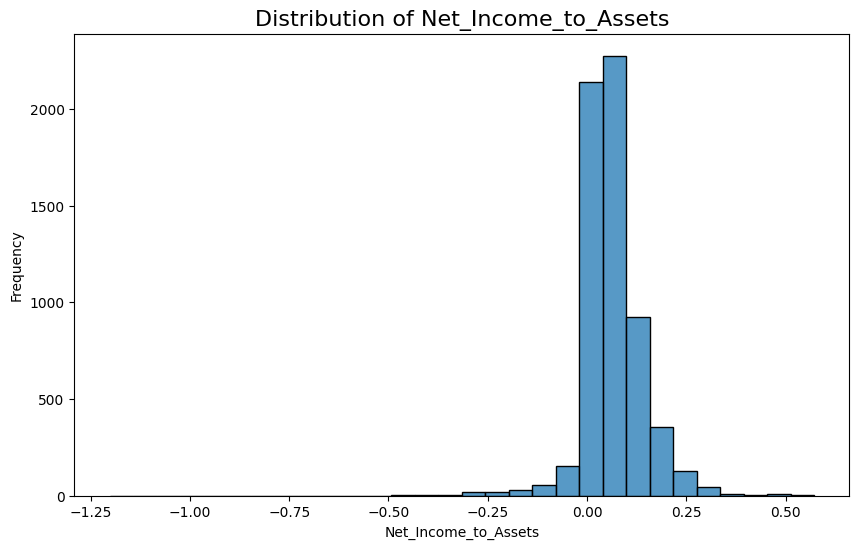

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


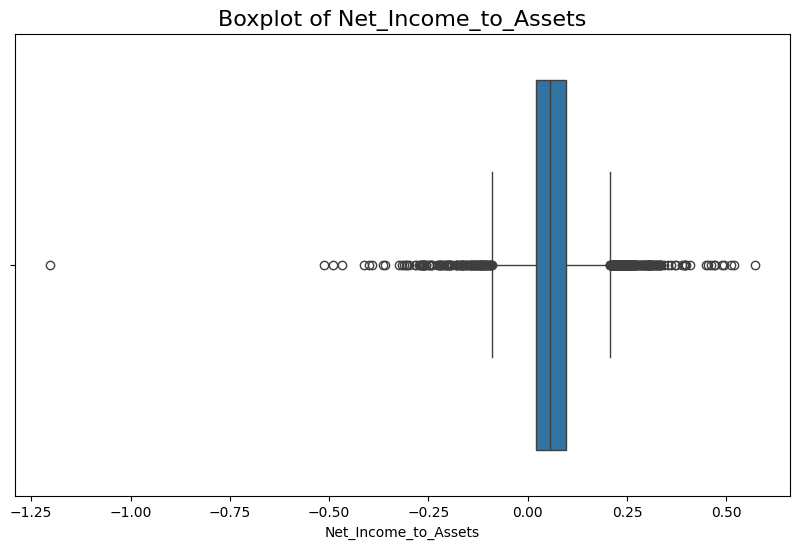

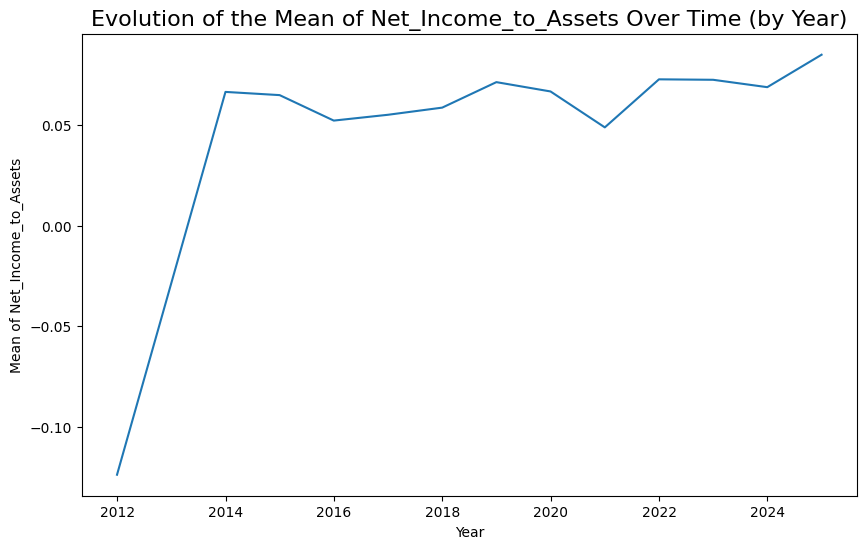

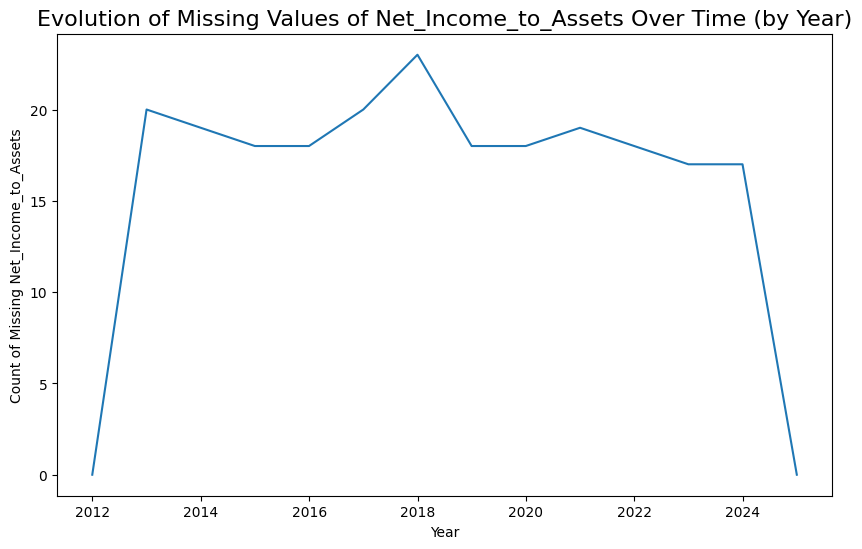

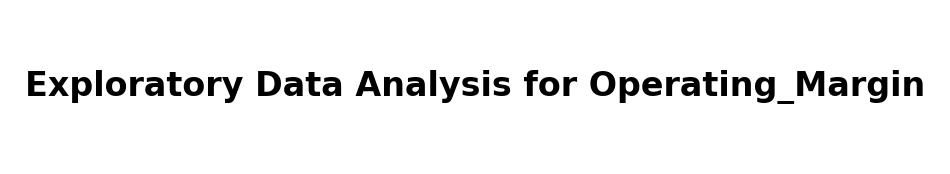

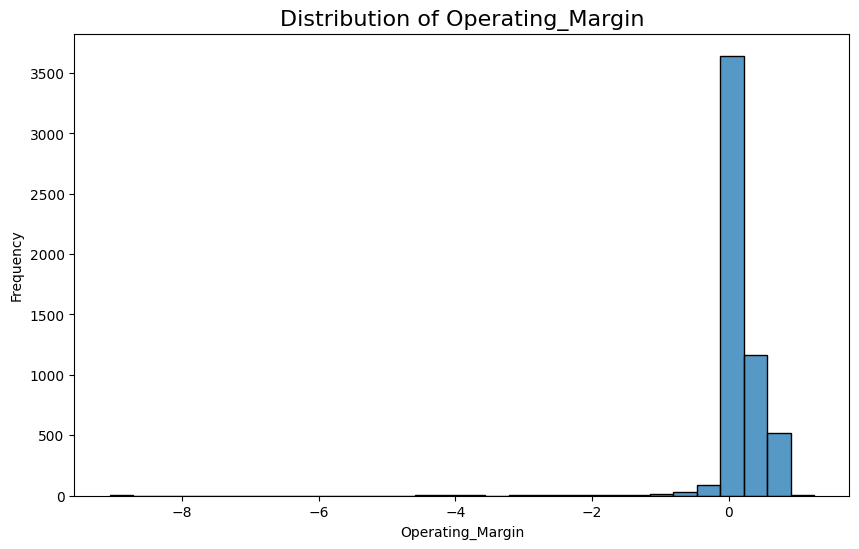

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


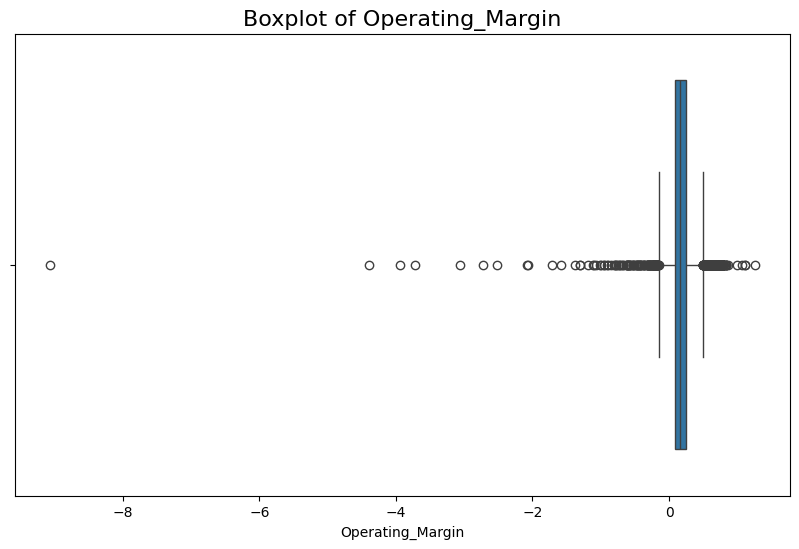

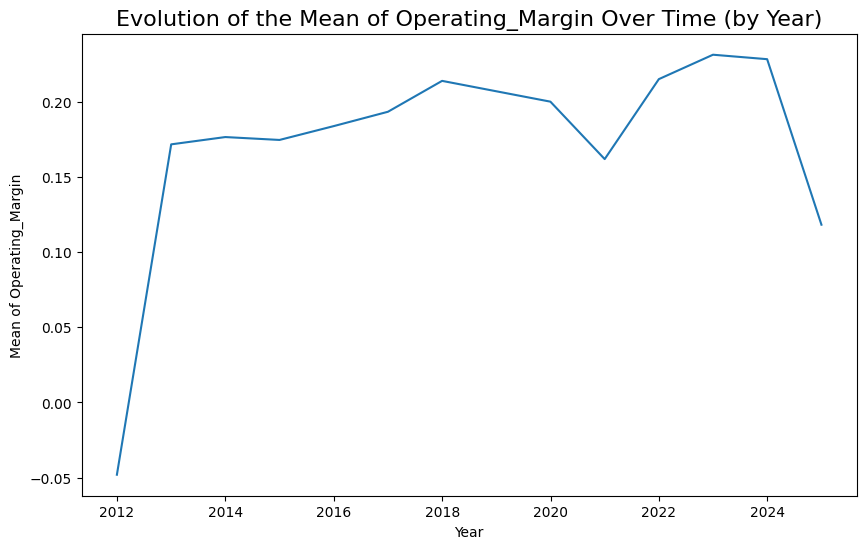

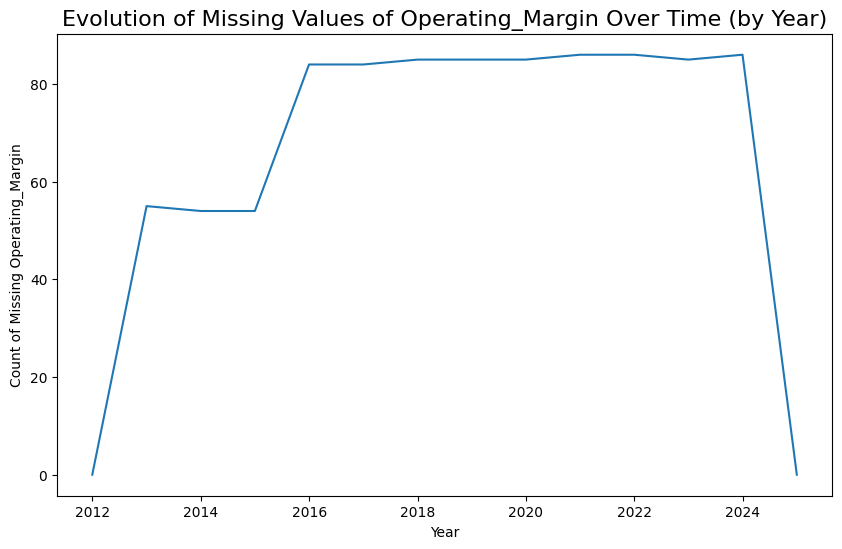

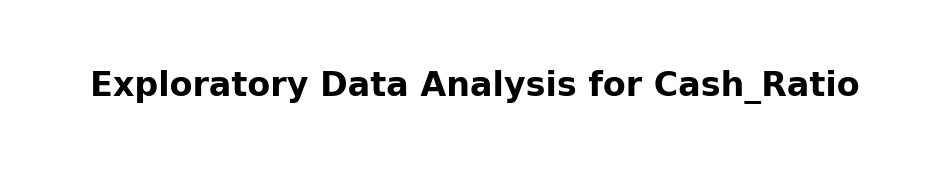

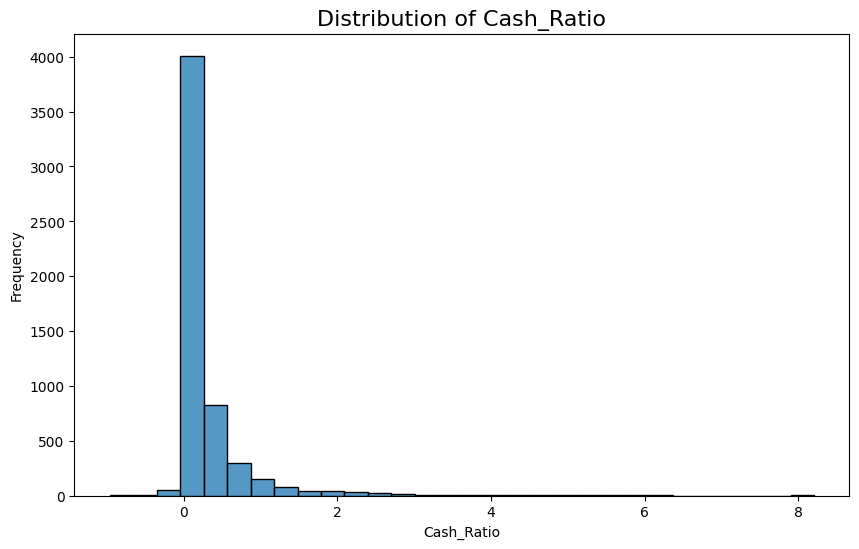

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


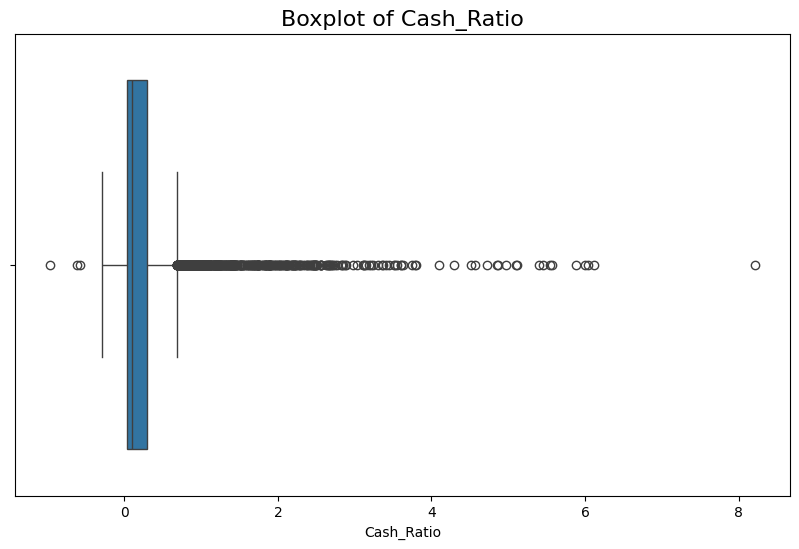

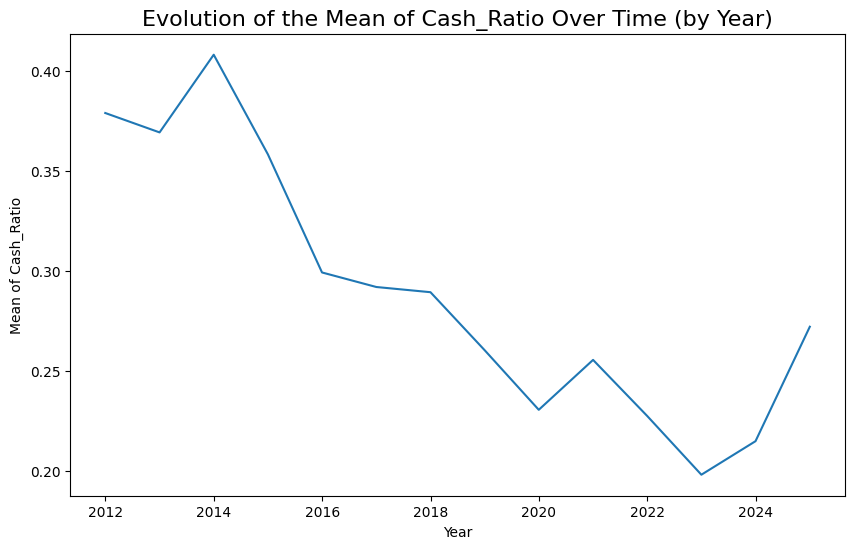

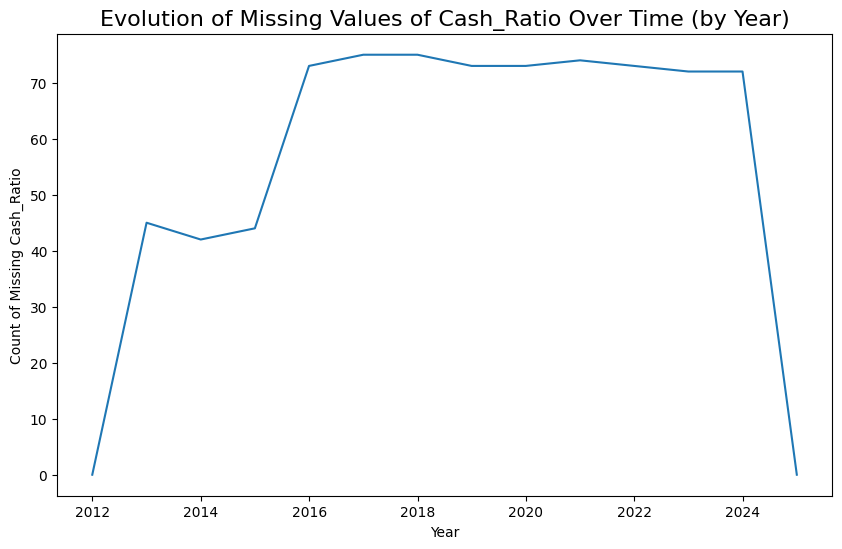

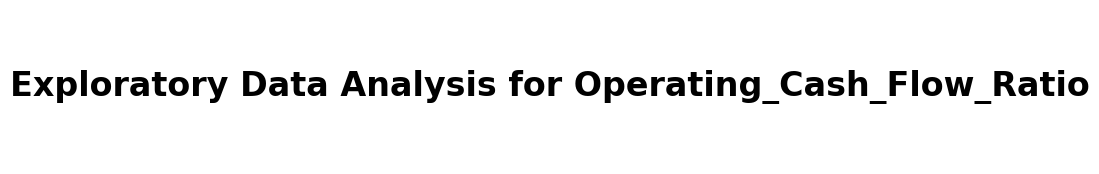

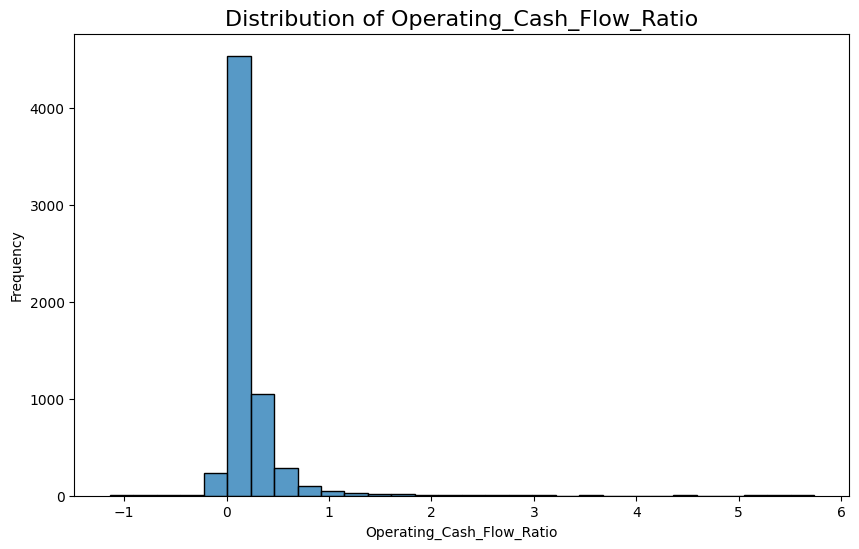

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


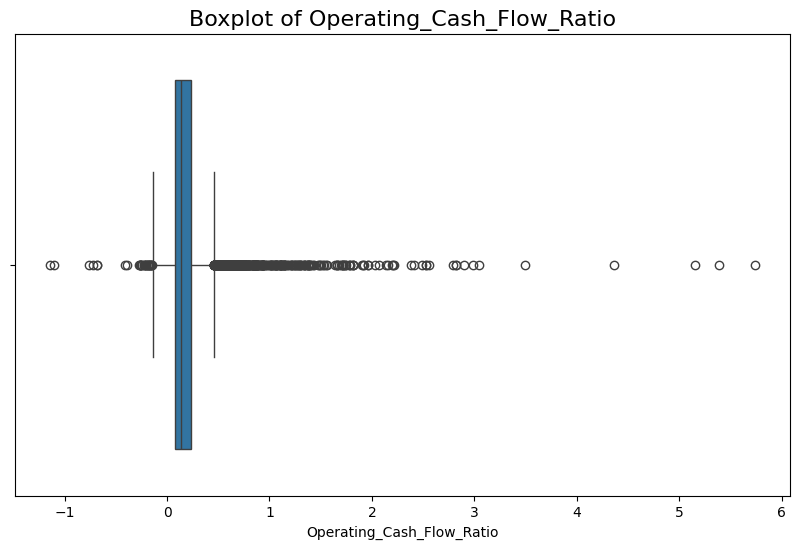

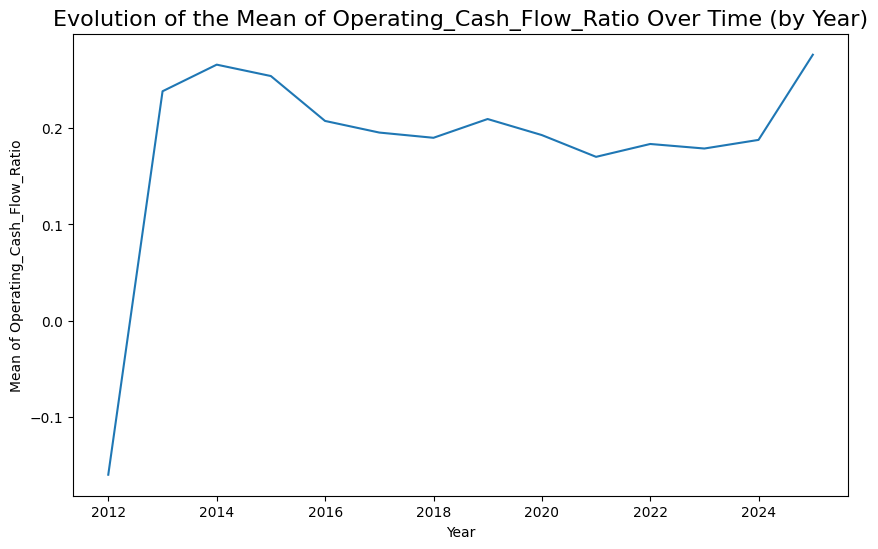

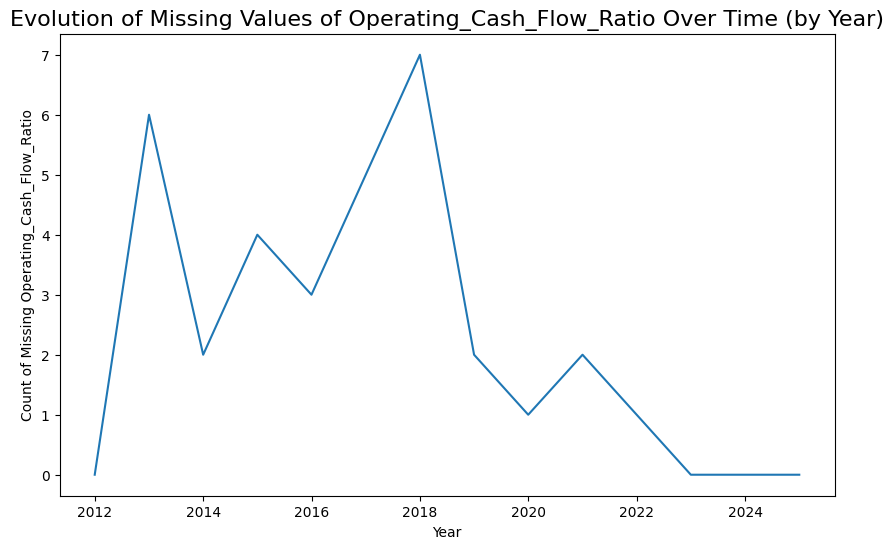

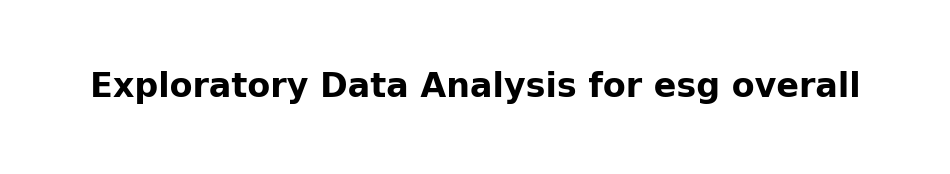

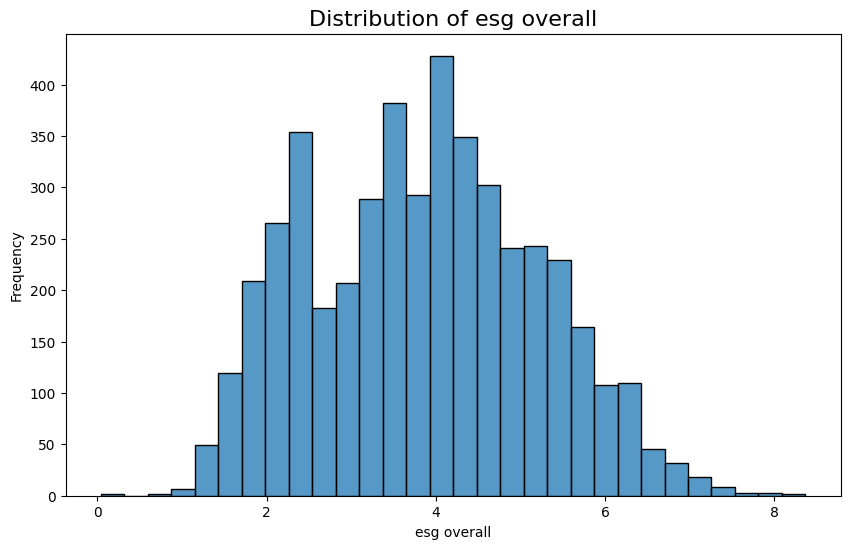

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


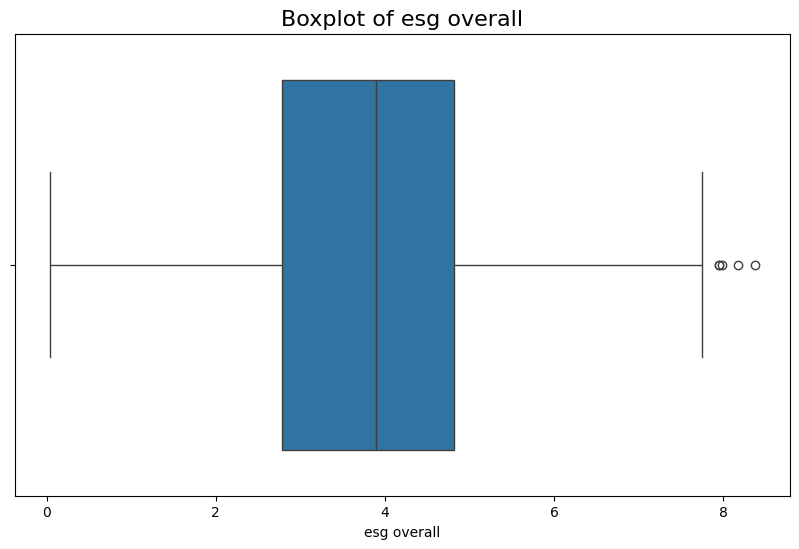

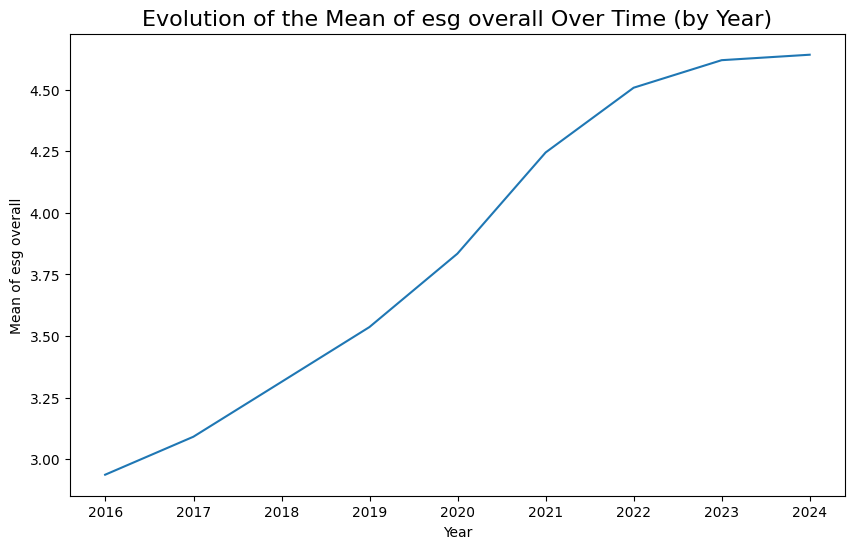

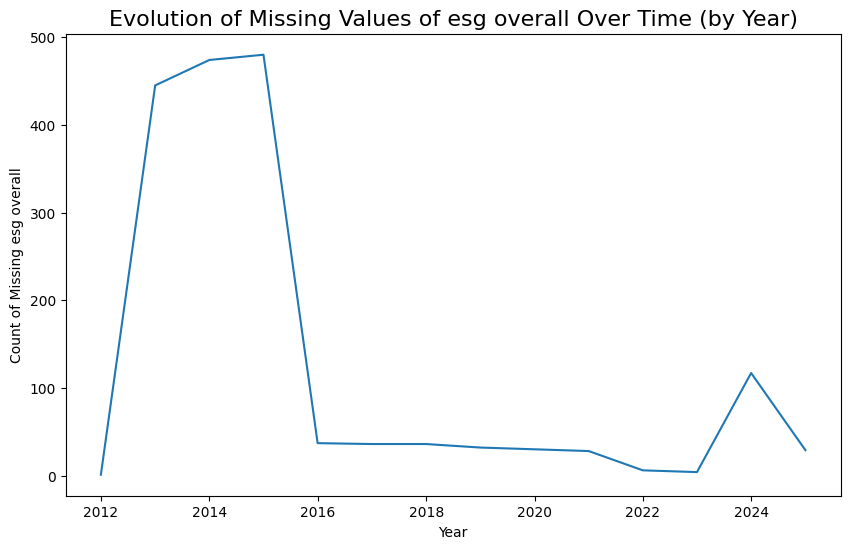

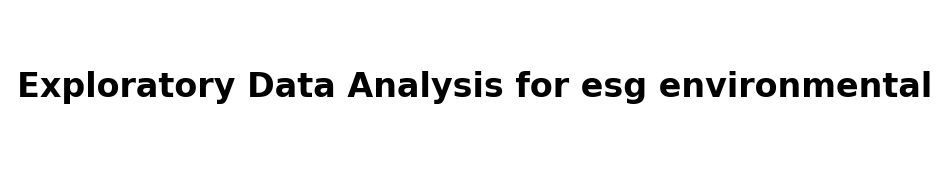

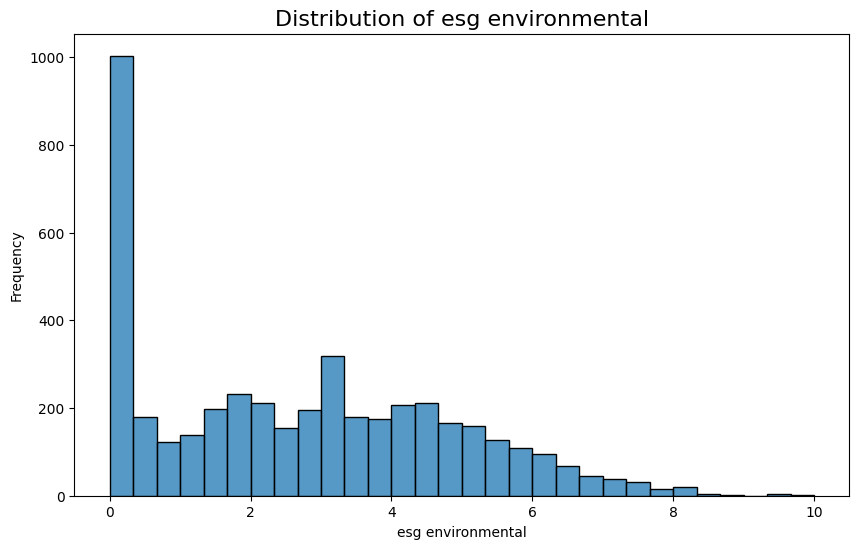

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


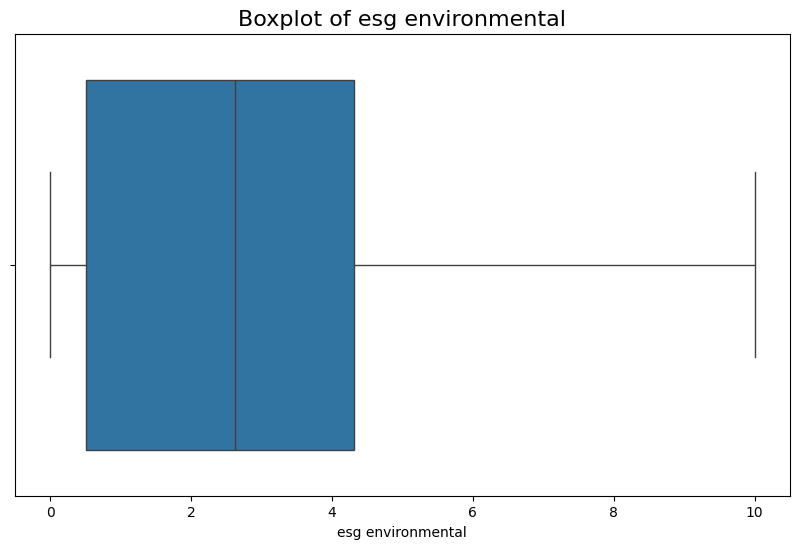

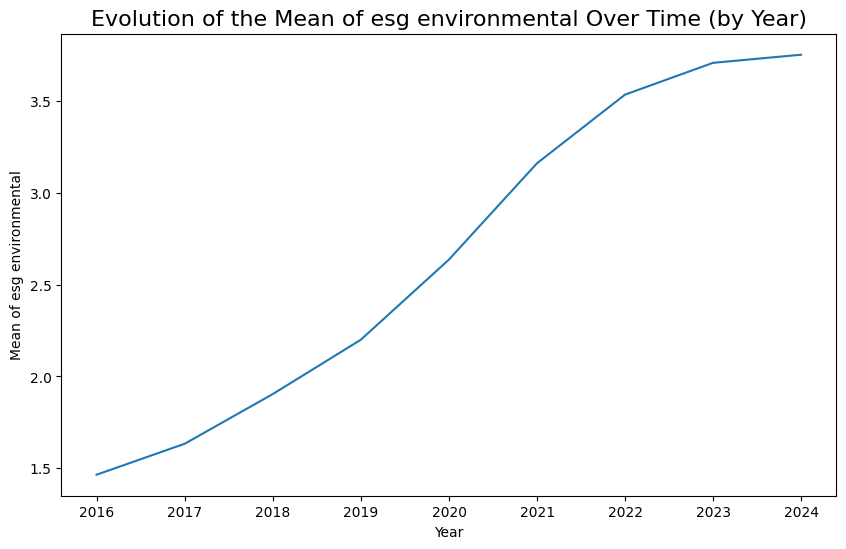

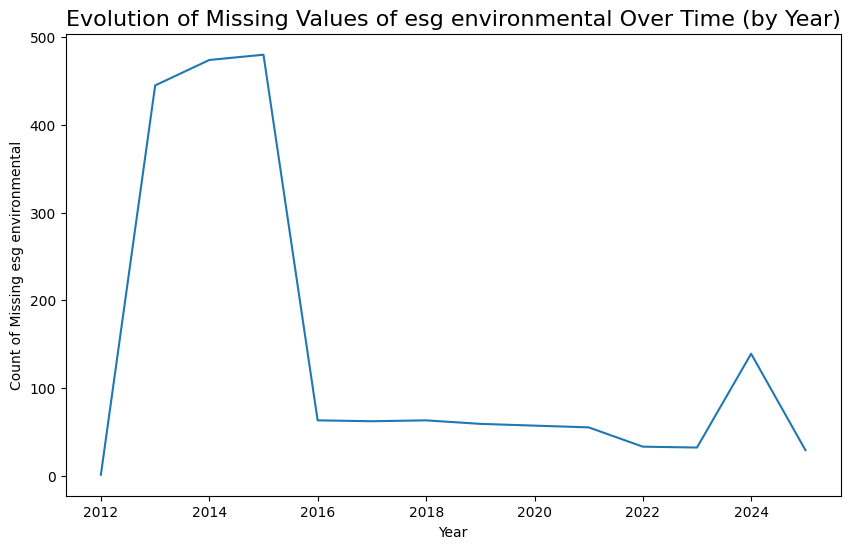

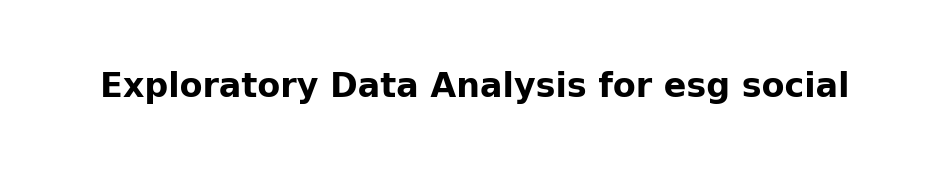

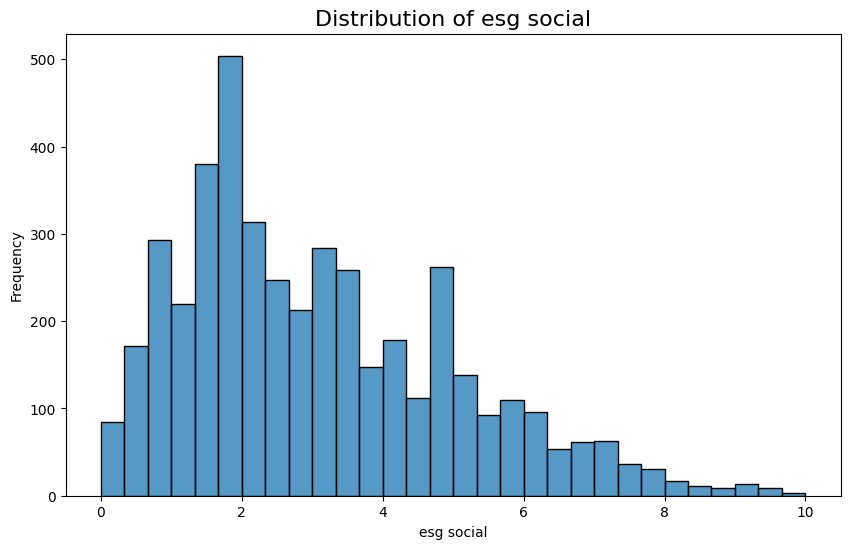

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


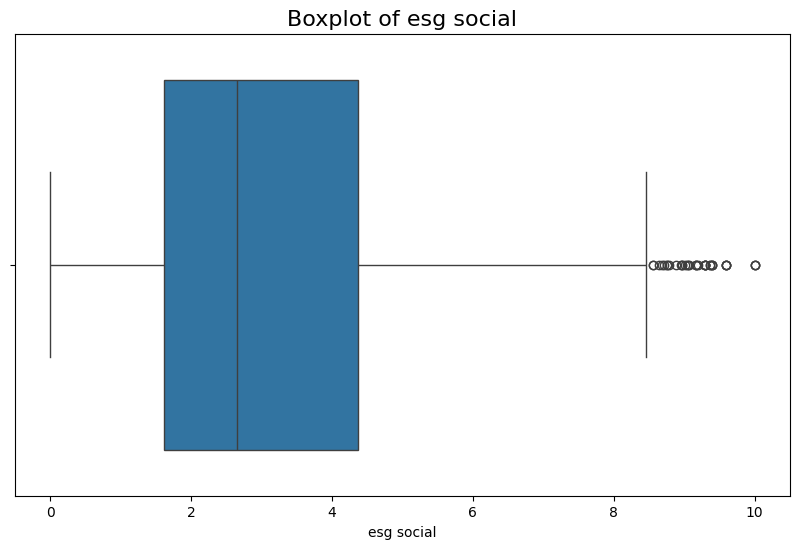

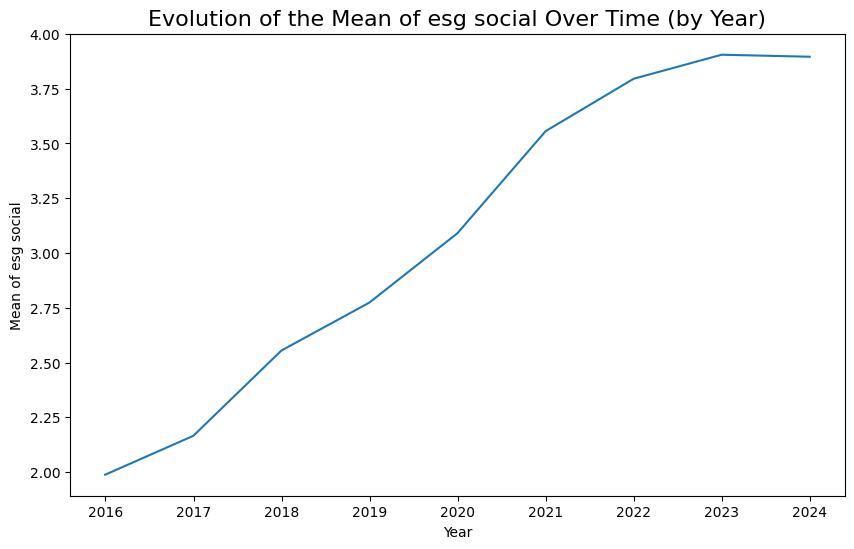

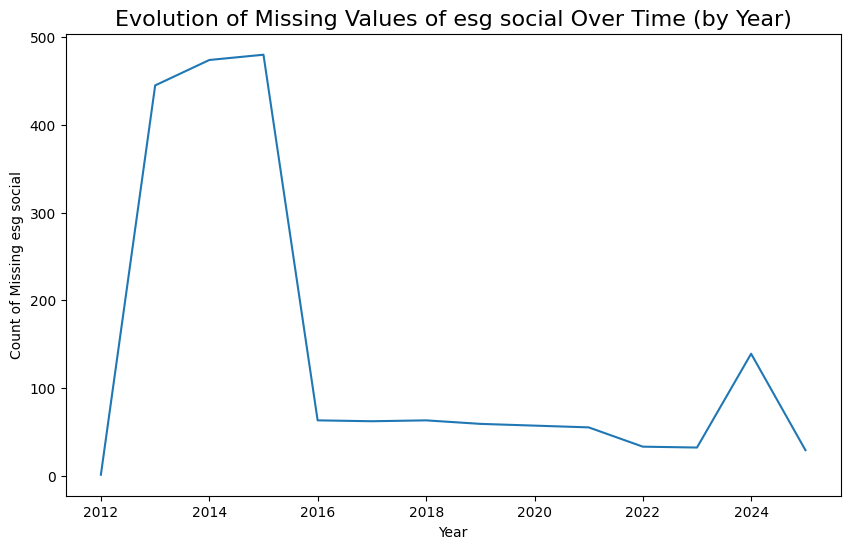

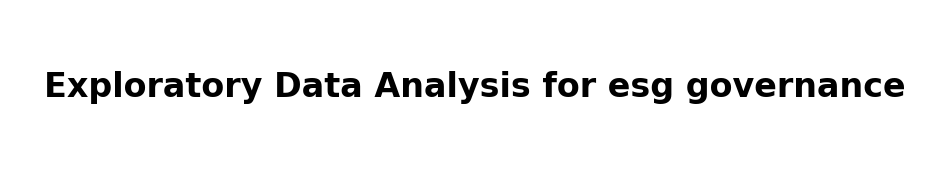

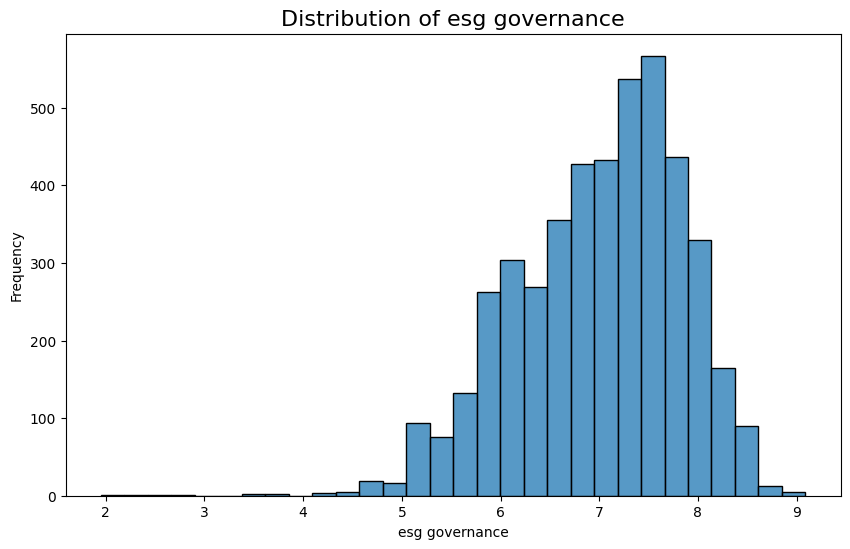

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


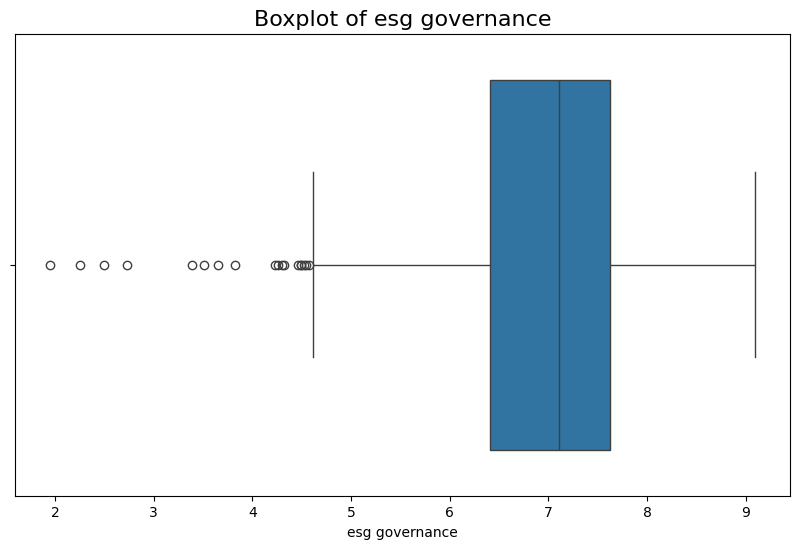

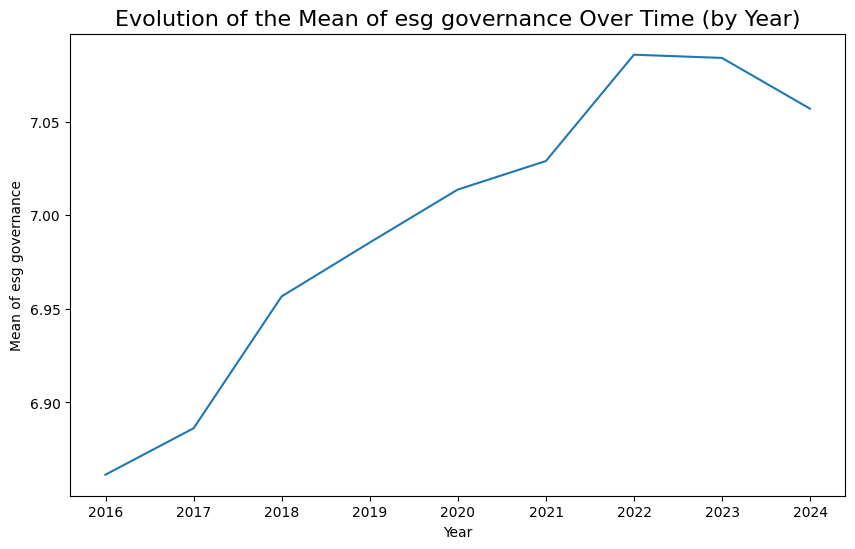

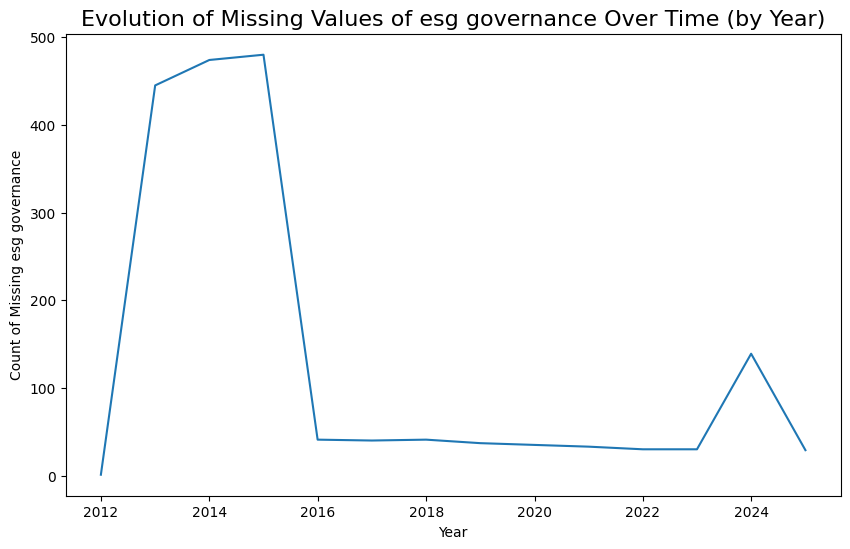

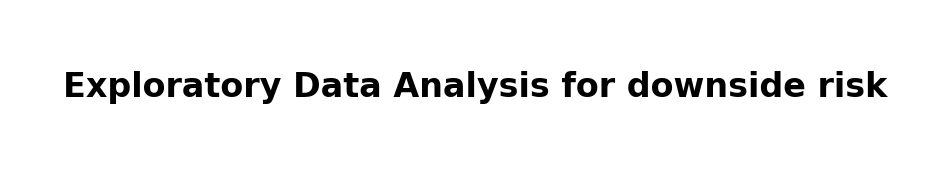

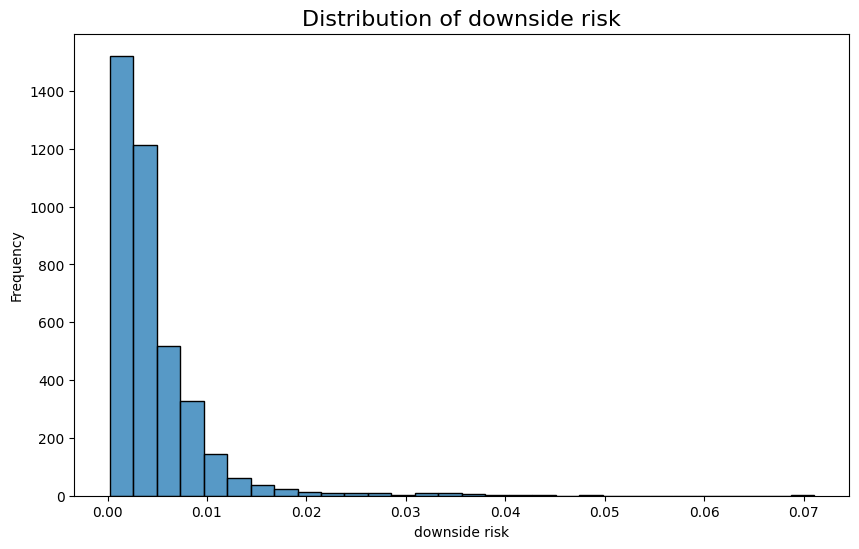

c:\Users\QTD9635\Documents\MyWorkspace\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


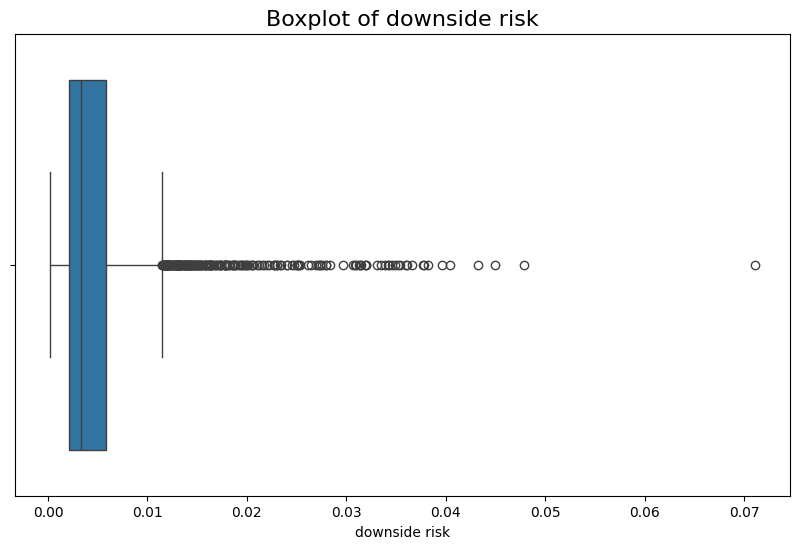

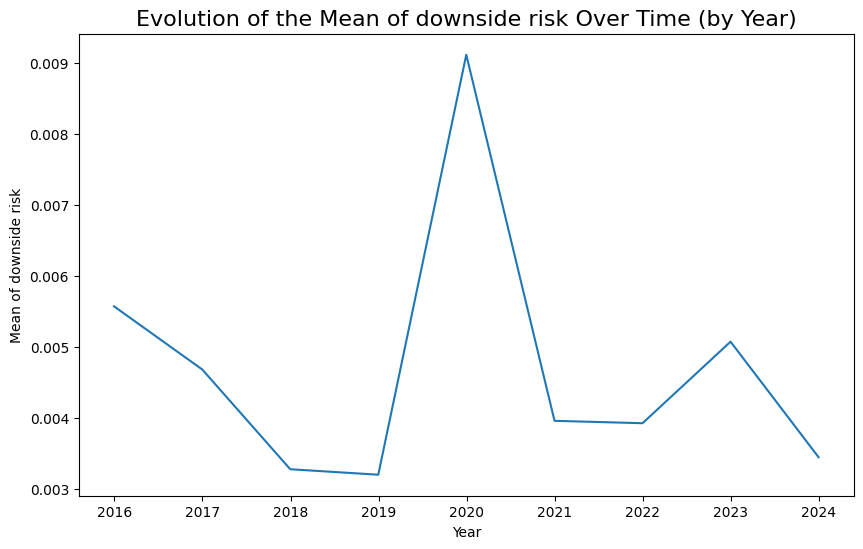

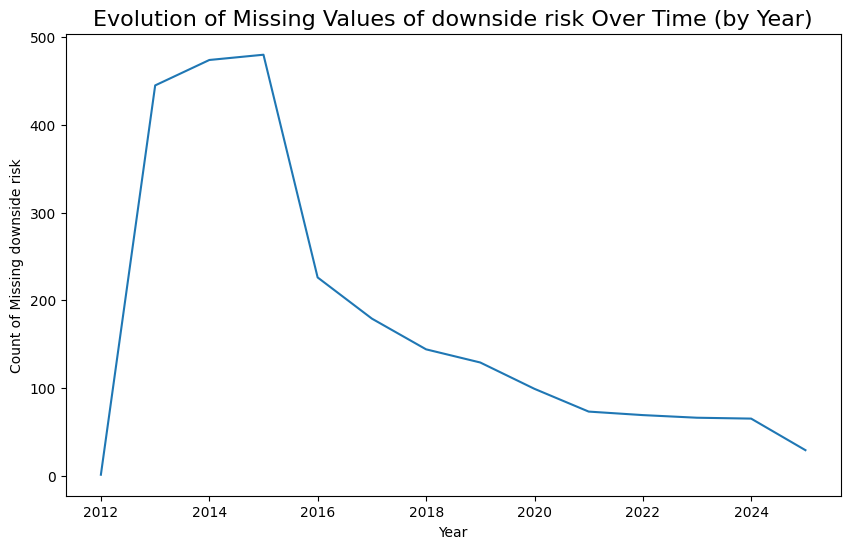

In [8]:
# UNIVARIATE ANALYSIS 
for feature in df.drop(['TICKER','Year','Settore'],axis=1).columns:
    EDA.EDA(df, feature=feature, target='downside risk')

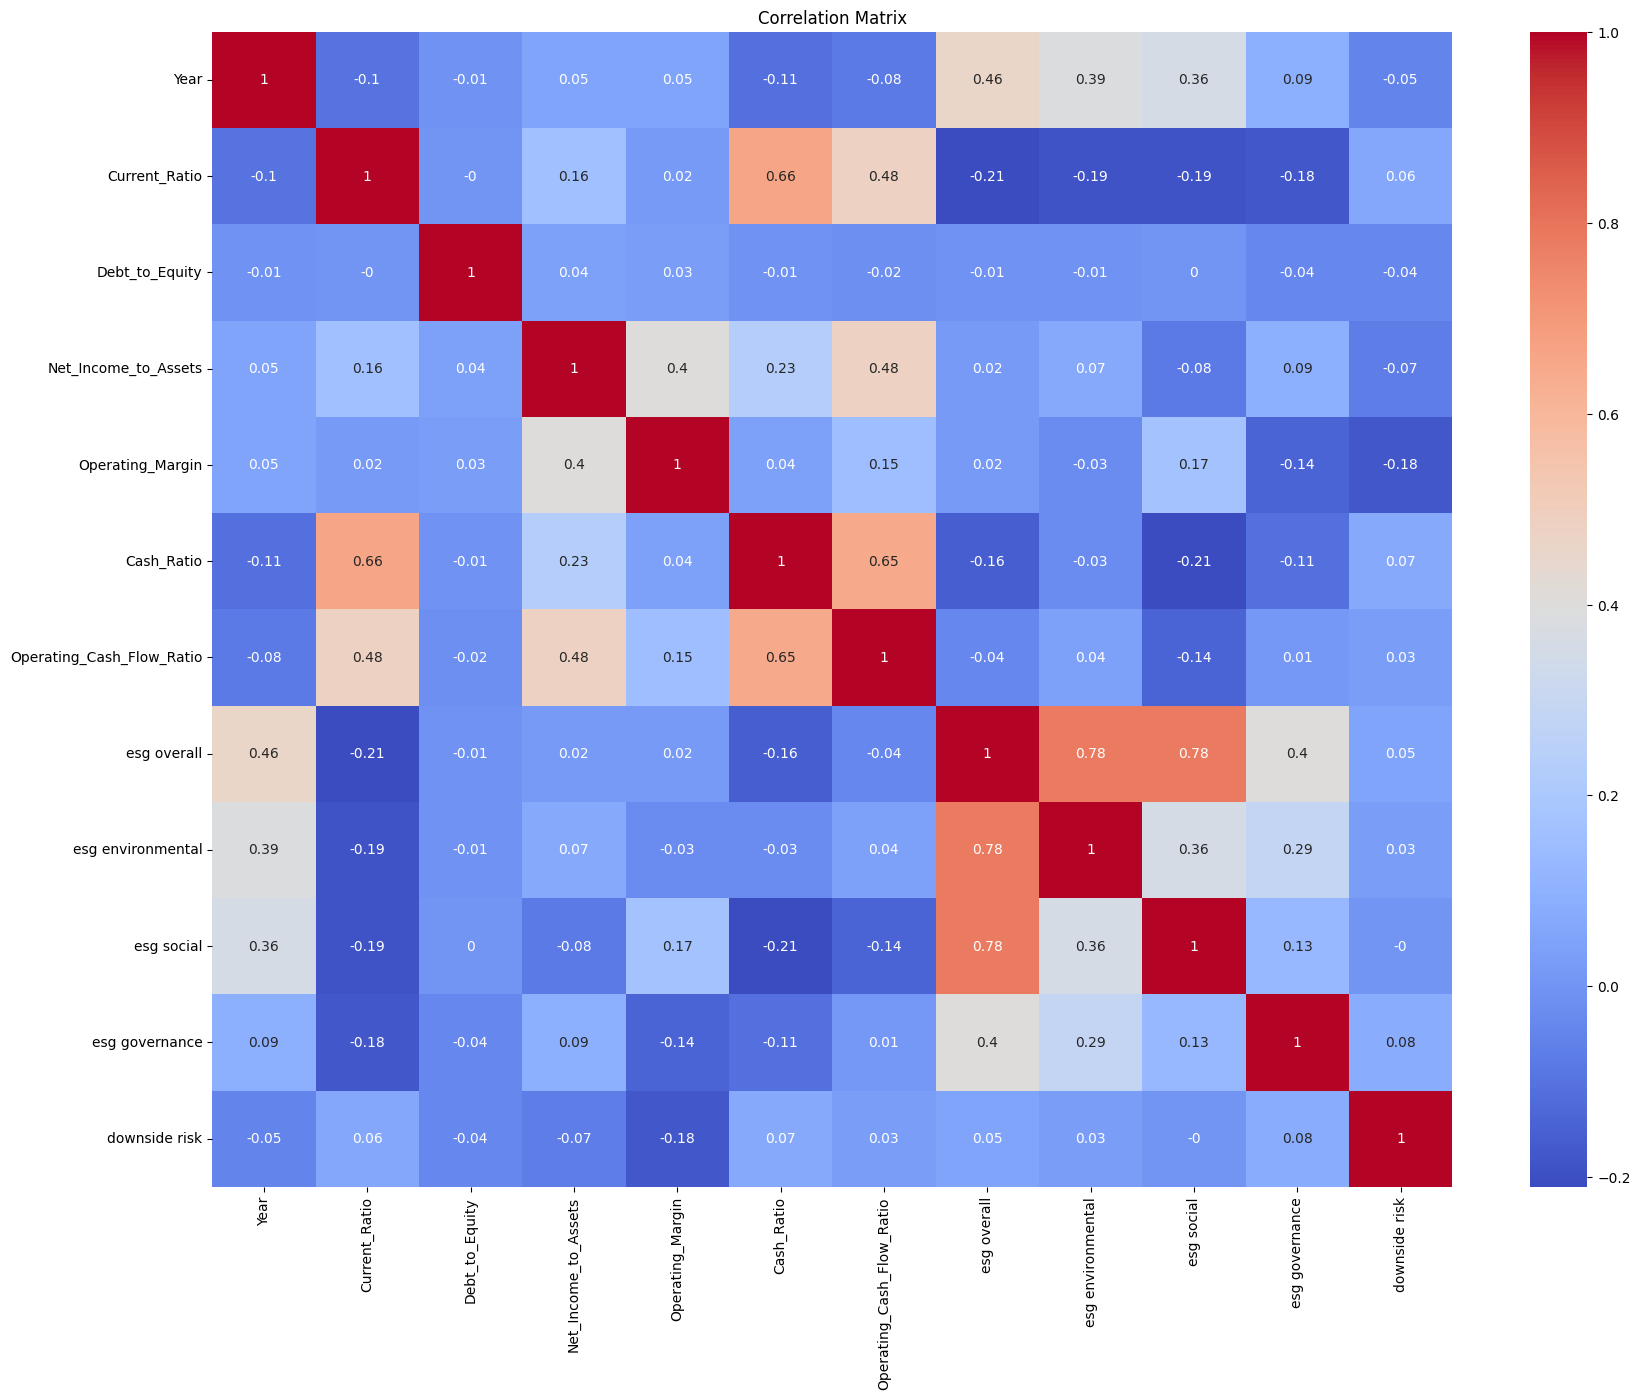

In [9]:
# CORRELATION
EDA.correlation_matrix(df.drop(['TICKER','Settore'],axis=1))

In [10]:
df['Settore']

0                                   NaN
1                                   NaN
2                                   NaN
3       Healthcare Equipment & Supplies
4       Healthcare Equipment & Supplies
                     ...               
6396                          Oil & Gas
6397                          Oil & Gas
6398                          Oil & Gas
6399                          Oil & Gas
6400                          Oil & Gas
Name: Settore, Length: 6401, dtype: object

### Not possible to inpute based on 'Settore' because of the many 'Settore' missing values

In [11]:
from utils import data_cleaning_functions 
data_cleaning_functions.impute_missing_data_by_group(df.drop(['downside risk','TICKER'],axis=1),group='Settore')

,Year,Current_Ratio,Debt_to_Equity,Net_Income_to_Assets,Operating_Margin,Cash_Ratio,Operating_Cash_Flow_Ratio,Settore,esg overall,esg environmental,esg social,esg governance
0,2012-01-01,2.445325,1.032015,0.109930,0.163167,0.439357,0.230530,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,3.110487,1.020420,0.069931,0.140224,0.495646,0.220316,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,3.231492,1.043199,0.043272,0.119037,0.401085,0.119560,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,3.776639,0.793525,0.052102,0.129272,0.605319,0.144191,Healthcare Equipment & Supplies,2.79,1.50,1.69,5.64
4,2016-01-01,3.846561,0.835610,0.058601,0.146359,0.645152,0.220960,Healthcare Equipment & Supplies,2.89,1.50,1.73,5.93
...,...,...,...,...,...,...,...,...,...,...,...,...
6396,2019-01-01,0.782197,0.822663,0.039674,0.045116,0.018875,0.182152,Oil & Gas,5.25,4.45,4.72,7.31
6397,2020-01-01,0.796498,1.027356,-0.072319,-0.171654,0.025881,0.093284,Oil & Gas,5.12,4.69,3.78,7.47
6398,2021-01-01,1.044330,0.929174,0.065479,0.083967,0.041669,0.283991,Oil & Gas,5.13,4.33,3.86,8.16
6399,2022-01-01,1.414020,0.822796,0.153927,0.159393,0.177918,0.469826,Oil & Gas,5.58,5.00,4.14,8.35


# Cleaning Missing Target

In [12]:
def cleaning(df):
    df = df.dropna(subset=['downside risk'])
    return df
df = cleaning(df)

In [14]:
df.to_csv('data/processed_data/cleaned_data.csv',index = False)